In [2]:
import pandas as pd

In [3]:
train_t = pd.read_csv('ieee-fraud-detection/train_transaction.csv')
test_t = pd.read_csv('ieee-fraud-detection/test_transaction.csv')
train_i = pd.read_csv('ieee-fraud-detection/train_identity.csv')
test_i = pd.read_csv('ieee-fraud-detection/test_identity.csv')

In [4]:
df_t = test_t.join(test_i.set_index('TransactionID'), on = 'TransactionID', how= 'left')
df_tn = train_t.join(train_i.set_index('TransactionID'), on = 'TransactionID', how= 'left')

In [5]:
df_tn.shape

(590540, 434)

In [6]:
df_t.shape

(506691, 433)

In [7]:
train_t.shape

(590540, 394)

In [47]:
merged = pd.merge(train_t,train_i[['TransactionID','DeviceType']],on= 'TransactionID', how='left')
merged = merged.drop('TransactionID', axis=1)

In [48]:
col_name = list(merged.columns)
numeric = list(merged._get_numeric_data().columns)

In [49]:
for i in col_name:
    if i in numeric:
        merged[i] = merged[i].fillna(-999)
    else:
        merged[i] = merged[i].fillna('unknown')

In [50]:
merged.head(20)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,DeviceType
0,0,86400,68.500,W,13926,-999.0,150.0,discover,142.0,credit,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,unknown
1,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,unknown
2,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,debit,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,unknown
3,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,unknown
4,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mobile
5,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,debit,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,unknown
6,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,debit,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,unknown
7,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,debit,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,unknown
8,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mobile
9,0,86536,117.000,W,17399,111.0,150.0,mastercard,224.0,debit,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,unknown


In [51]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

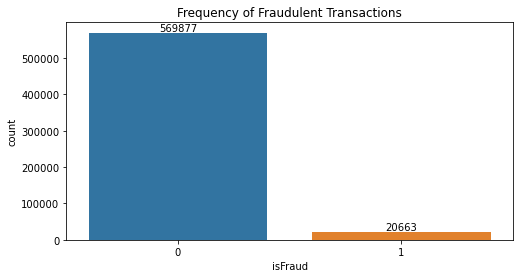

In [52]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x = 'isFraud',data = merged)
ax.bar_label(ax.containers[0])
plt.title('Frequency of Fraudulent Transactions')
plt.show()

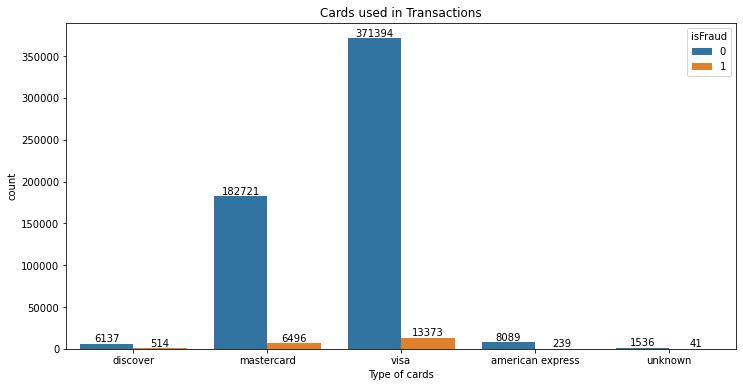

In [53]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x ='card4', hue ='isFraud', data = merged)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Cards used in Transactions')
plt.xlabel('Type of cards')
plt.show()

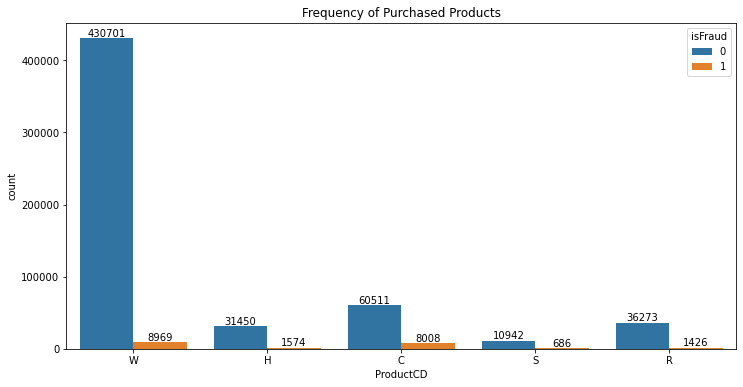

In [54]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x ='ProductCD', hue ='isFraud', data = merged)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Frequency of Purchased Products')
plt.show()

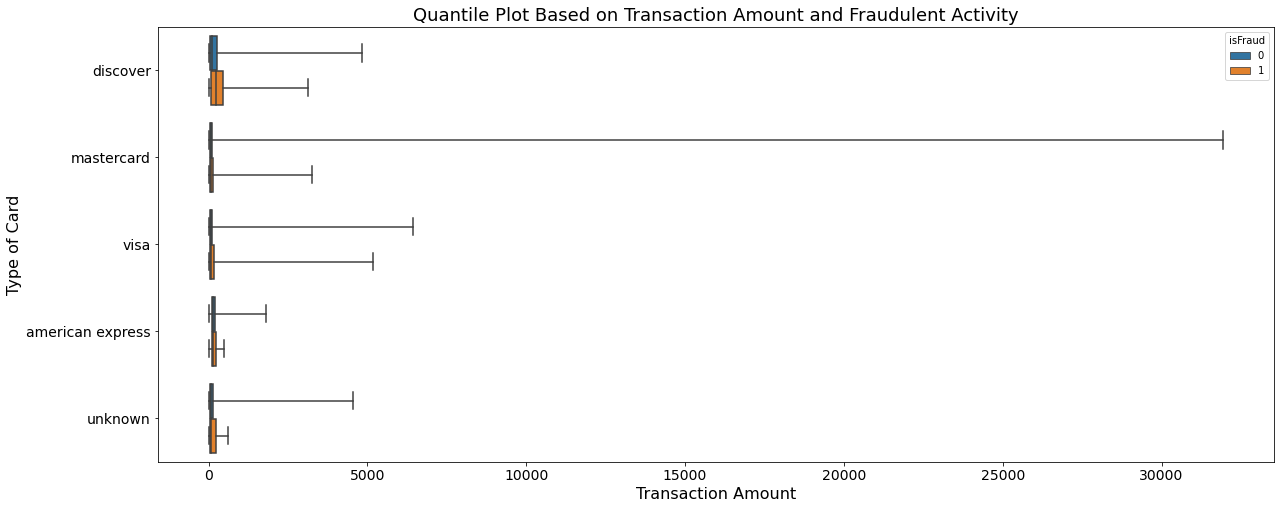

In [95]:
plt.figure(figsize=(20, 8))
ax = sns.boxplot(data = merged, x='TransactionAmt', y='card4',hue='isFraud', whis=(0, 100))
ax.tick_params(labelsize=14)
plt.title('Quantile Plot Based on Transaction Amount and Fraudulent Activity', fontsize = 18)
plt.ylabel('Type of Card', fontsize = 16)
plt.xlabel('Transaction Amount', fontsize = 16)
plt.show()

In [98]:
merged['TransactionAmt'].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

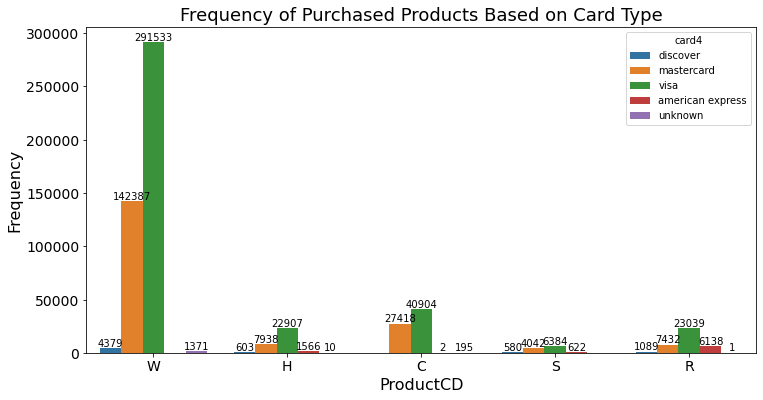

In [57]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x ='ProductCD', hue ='card4', data = merged)
ax.tick_params(labelsize=14)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
plt.title('Frequency of Purchased Products Based on Card Type', fontsize = 18)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('ProductCD', fontsize = 16)
plt.show()

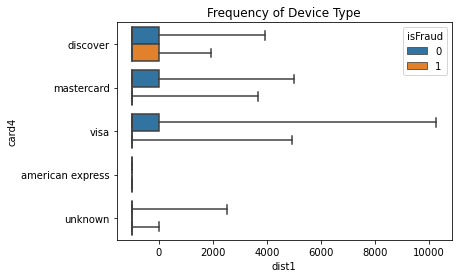

In [60]:
sns.boxplot(data = merged, x ='dist1', y ='card4',hue='isFraud', whis=(0, 100))
plt.title('Frequency of Device Type')
plt.show()

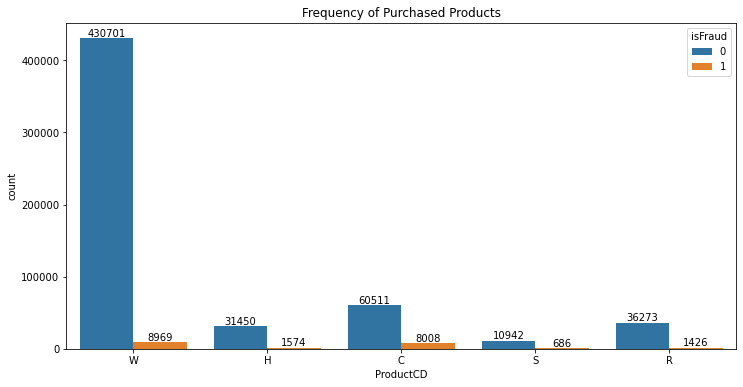

In [62]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x ='ProductCD', hue ='isFraud', data = merged)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Frequency of Purchased Products')
plt.show()

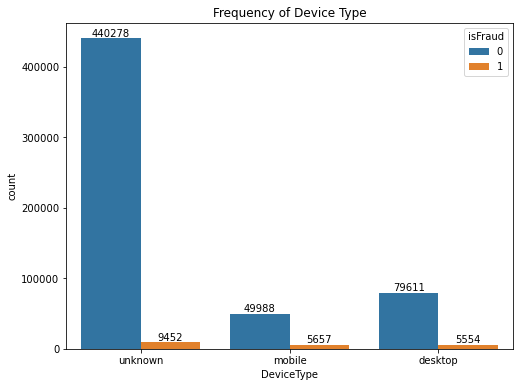

In [63]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x ='DeviceType', hue ='isFraud', data = merged)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Frequency of Device Type')
plt.show()

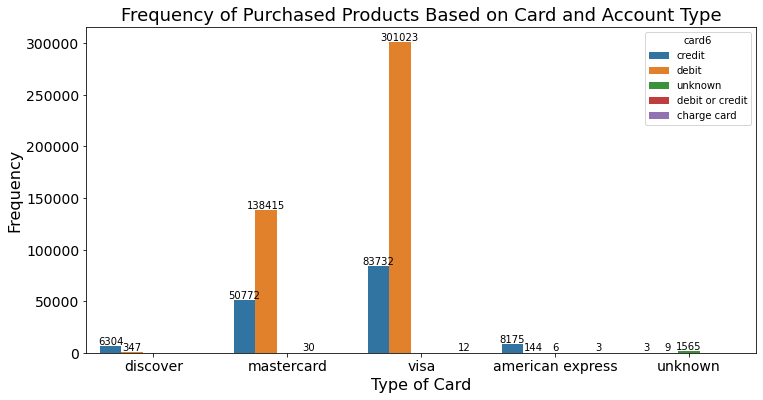

In [64]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x ='card4', hue ='card6', data = merged)
ax.tick_params(labelsize=14)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
plt.title('Frequency of Purchased Products Based on Card and Account Type', fontsize = 18)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('Type of Card', fontsize = 16)
plt.show()

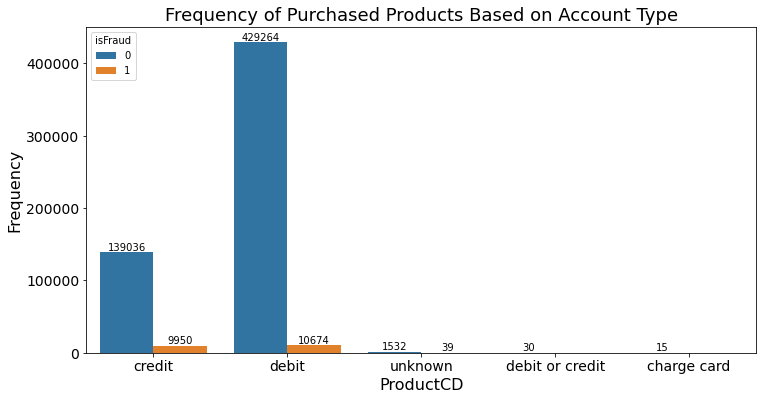

In [99]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x ='card6', hue ='isFraud', data = merged)
ax.tick_params(labelsize=14)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Frequency of Purchased Products Based on Account Type', fontsize = 18)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('ProductCD', fontsize = 16)
plt.show()

In [83]:
m = pd.merge(train_t,train_i[['TransactionID','DeviceType']],on= 'TransactionID', how='left')
v = [i for i in numeric if 'V' in i]
v.append('isFraud')
c = [i for i in numeric if 'C' in i]
c.append('isFraud')
d = [i for i in numeric if 'D' in i]
d.append('isFraud')

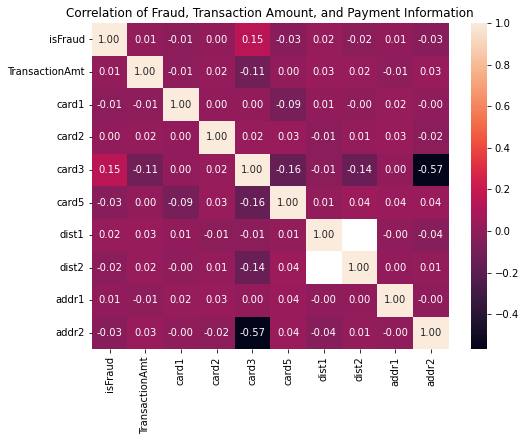

In [103]:
plt.figure(figsize=(8, 6))
sns.heatmap(m[['isFraud', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'dist1','dist2', 'addr1', 'addr2']].corr(),annot=True, fmt=".2f")
plt.title('Correlation of Fraud, Transaction Amount, and Payment Information')
plt.show()

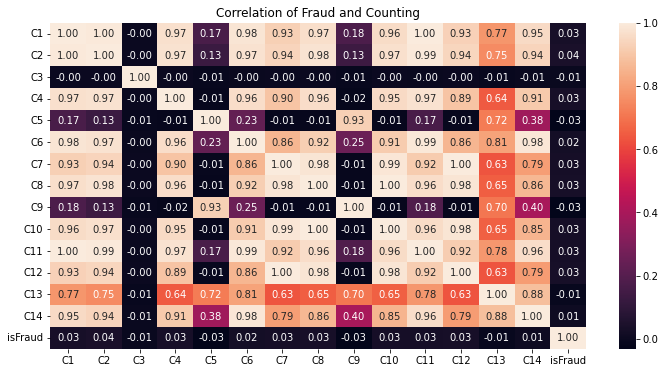

In [89]:
plt.figure(figsize=(12, 6))
sns.heatmap(m[c].corr(), annot=True, fmt=".2f")
plt.title('Correlation of Fraud and Counting')
plt.show()

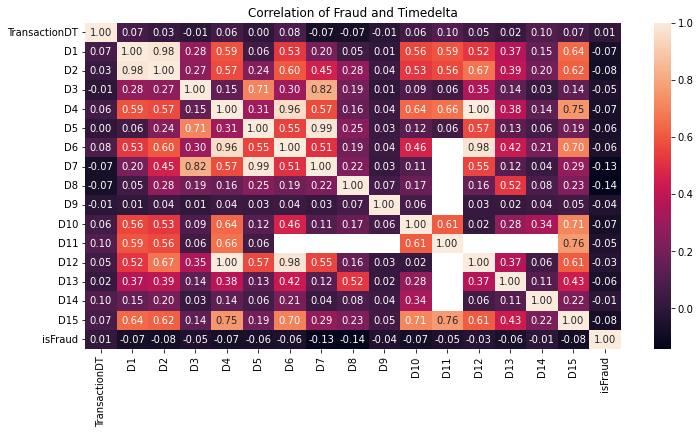

In [90]:
plt.figure(figsize=(12, 6))
sns.heatmap(m[d].corr(), annot=True, fmt=".2f")
plt.title('Correlation of Fraud and Timedelta')
plt.show()

In [100]:
m['dist1'].describe()

count    238269.000000
mean        118.502180
std         371.872026
min           0.000000
25%           3.000000
50%           8.000000
75%          24.000000
max       10286.000000
Name: dist1, dtype: float64

In [101]:
m['dist2'].describe()

count    37627.000000
mean       231.855423
std        529.053494
min          0.000000
25%          7.000000
50%         37.000000
75%        206.000000
max      11623.000000
Name: dist2, dtype: float64